
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions

Let's go through these steps!

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('T1.csv')

In [3]:
df.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [4]:
df.tail()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
50525,31 12 2018 23:10,2963.980957,11.404030,3397.190793,80.502724
50526,31 12 2018 23:20,1684.353027,7.332648,1173.055771,84.062599
50527,31 12 2018 23:30,2201.106934,8.435358,1788.284755,84.742500
50528,31 12 2018 23:40,2515.694092,9.421366,2418.382503,84.297913
50529,31 12 2018 23:50,2820.466064,9.979332,2779.184096,82.274620


In [5]:
dataset = df[['Date/Time','Wind Speed (m/s)']]
dataset = dataset.rename(columns = {"Date/Time" :"timeStamp","Wind Speed (m/s)":"windSpeed"})
#dataset = dataset[:5000]

# MISSING DATA POINTS
# 2018-01-26 06:20:00  to  2018-01-30 14:40:00
# 2018-09-28 21:20:00  to  2018-10-02 16:30:00
# 2018-11-10 21:10:00  to  2018-11-14 12:00:00

newTime = []
for i in dataset['timeStamp']:
    # YYYY-MM-DD HH:MM:SS   => Required
    # DD MM YYYY HH:MM      => my format
    #print("{0}-{1}-{2} {3}:00".format(i[6:10],i[3:5],i[:2],i[11:16]))
    newTime.append(i[6:10] + "-" + i[3:5] + "-" + i[:2] + " " + i[11:16] + ":00")
dataset['timeStamp'] = newTime


In [6]:
dataset.tail()

,timeStamp,windSpeed
50525,2018-12-31 23:10:00,11.404030
50526,2018-12-31 23:20:00,7.332648
50527,2018-12-31 23:30:00,8.435358
50528,2018-12-31 23:40:00,9.421366
50529,2018-12-31 23:50:00,9.979332


In [7]:
# Convert Month into Datetime
dataset['timeStamp']=pd.to_datetime(dataset['timeStamp'])

In [8]:
dataset.set_index('timeStamp',inplace=True)

In [9]:
dataset.head()

,windSpeed
timeStamp,
2018-01-01 00:00:00,5.311336
2018-01-01 00:10:00,5.672167
2018-01-01 00:20:00,5.216037
2018-01-01 00:30:00,5.659674
2018-01-01 00:40:00,5.577941


In [10]:
dataset.describe()

,windSpeed
count,50530.000000
mean,7.557952
std,4.227166
min,0.000000
25%,4.201395
50%,7.104594
75%,10.300020
max,25.206011


# Data preprocessing


In [11]:
dataset = dataset.sort_index()
dataset.fillna(dataset.mean())

,windSpeed
timeStamp,
2018-01-01 00:00:00,5.311336
2018-01-01 00:10:00,5.672167
2018-01-01 00:20:00,5.216037
2018-01-01 00:30:00,5.659674
2018-01-01 00:40:00,5.577941
...,...
2018-12-31 23:10:00,11.404030
2018-12-31 23:20:00,7.332648
2018-12-31 23:30:00,8.435358


## Step 2: Visualize the Data

<AxesSubplot:xlabel='timeStamp'>

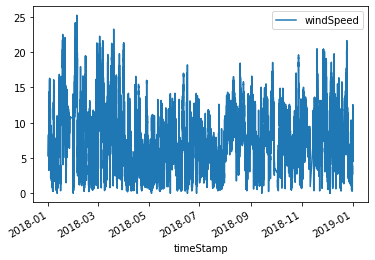

In [12]:
dataset.plot()

In [13]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [14]:
test_result=adfuller(dataset['windSpeed'])

In [15]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(windSpeed):
    result=adfuller(windSpeed)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [16]:
adfuller_test(dataset['windSpeed'])

ADF Test Statistic : -14.932536033900629
p-value : 1.359563095278069e-27
#Lags Used : 9
Number of Observations Used : 50520
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## Differencing

In my situation my p-value is less than 0.05 so our data is stationary and I did not do the differencing

In [42]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [44]:
df['Sales'].shift(1)

0              NaN
1         5.311336
2         5.672167
3         5.216037
4         5.659674
           ...    
50525    12.559170
50526    11.404030
50527     7.332648
50528     8.435358
50529     9.421366
Name: Wind Speed (m/s), Length: 50530, dtype: float64

In [45]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [46]:
df.head(14)

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),Sales First Difference,Seasonal First Difference
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904,NaN,NaN
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113,0.360831,NaN
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789,-0.456130,NaN
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087,0.443637,NaN
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286,-0.081733,NaN
5,01 01 2018 00:50,402.391998,5.604052,499.436385,264.578613,0.026111,NaN
6,01 01 2018 01:00,447.605713,5.793008,557.372363,266.163605,0.188956,NaN
7,01 01 2018 01:10,387.242188,5.306050,414.898179,257.949493,-0.486958,NaN
8,01 01 2018 01:20,463.651215,5.584629,493.677652,253.480698,0.278579,NaN
9,01 01 2018 01:30,439.725708,5.523228,475.706783,258.723785,-0.061401,NaN


In [47]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -33.5942954119397
p-value : 0.0
#Lags Used : 57
Number of Observations Used : 50460
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:>

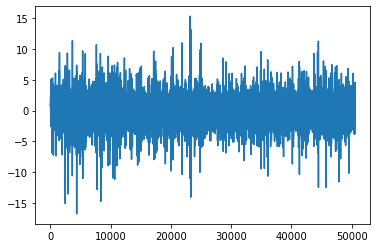

In [48]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model
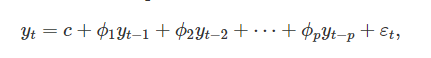

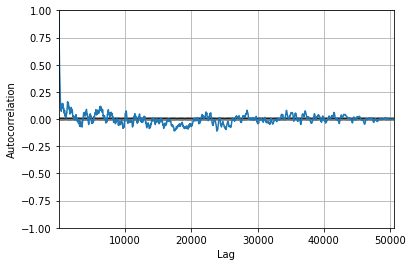

In [17]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(dataset['windSpeed'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q<br>
    p AR model lags<br>
    d differencing<br>
    q MA lags

In [18]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

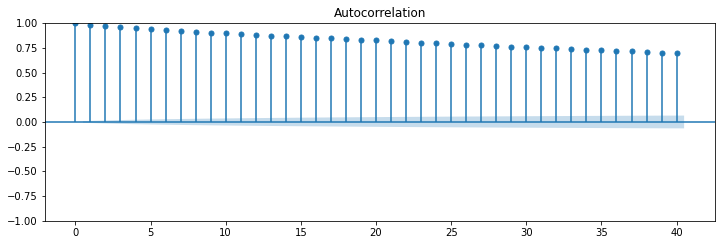

In [19]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dataset['windSpeed'].iloc[13:],lags=40,ax=ax1)
# ax2 = fig.add_subplot(212)
# fig = sm.graphics.tsa.plot_pacf(df['Sales'].iloc[13:],lags=40,ax=ax2)

In [20]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
import statsmodels.api as sm

In [21]:
model=sm.tsa.arima.ARIMA(dataset['windSpeed'],order=(1,1,1))
model_fit=model.fit()

C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [22]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              windSpeed   No. Observations:                50530
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -56839.021
Date:                Mon, 12 Dec 2022   AIC                         113684.043
Time:                        16:12:02   BIC                         113710.533
Sample:                             0   HQIC                        113692.337
                              - 50530                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7177      0.007    104.003      0.000       0.704       0.731
ma.L1         -0.8065      0.007   -121.758      0.000      -0.819      -0.794
sigma2         0.5554      0.001    473.026      0.000       0.553       0.558
===================================================================================
Ljung-Box (L1) (Q):                   3.14   Jarque-Bera (JB):           1135653.45
Prob(Q):                              0.08   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='timeStamp'>

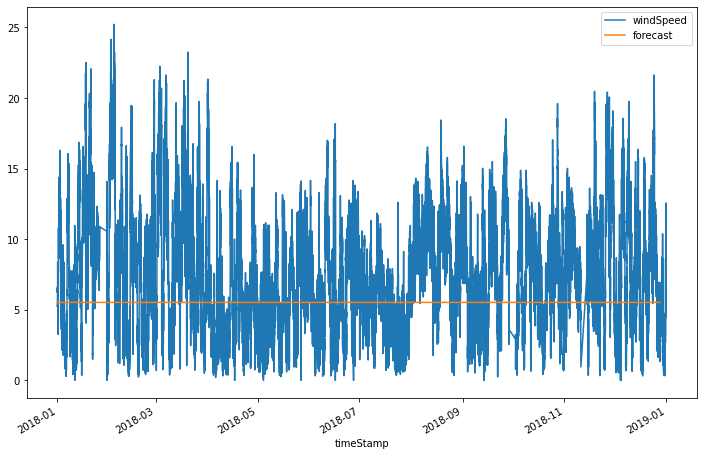

In [23]:
dataset['forecast'] = model_fit.predict(start=10,end=50000,dynamic=True)
dataset[['windSpeed','forecast']].plot(figsize=(12,8))

In [30]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(dataset['windSpeed'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ujjwa\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
dataset['forecast']=results.predict(start=4000,end=4999,dynamic=True)
dataset[['windSpeed','forecast']].plot(figsize=(12,8))

In [35]:
from pandas.tseries.offsets import DateOffset
future_dates=[dataset.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [36]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [37]:
future_datest_df.tail()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
2020-07-31 23:50:00,NaN,NaN,NaN,NaN,NaN
2020-08-31 23:50:00,NaN,NaN,NaN,NaN,NaN
2020-09-30 23:50:00,NaN,NaN,NaN,NaN,NaN
2020-10-31 23:50:00,NaN,NaN,NaN,NaN,NaN
2020-11-30 23:50:00,NaN,NaN,NaN,NaN,NaN


In [38]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

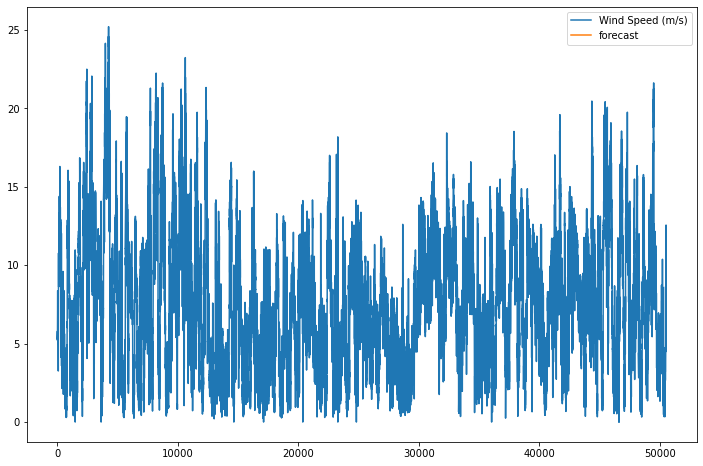

In [50]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Wind Speed (m/s)', 'forecast']].plot(figsize=(12, 8)) 